In [315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [284]:
df = pd.read_csv('/Users/data/VsCodeProjects/DataScience/data/raw/eurusd_hour.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [4]:
from datetime import datetime, date, time

#перевод с строки даты в дату общего формата
def str_to_datetime(s: str):
    splited = s.split('-')
    year, month, day = int(splited[0]), int(splited[1]), int(splited[2])
    return datetime.datetime(year=year, month=month, day=day)




Изменение формата времени к объекту datetime

In [5]:
def str_hours_to_datetime(t: str):
    splited = t.split(':')
    hour, minute = int(splited[0]), int(splited[1])
    return datetime.time(hour=hour, minute=minute)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [285]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Time']).dt.time

/var/folders/9c/vk6dn3k90g9cy2bswv5c6kk00000gn/T/ipykernel_61727/4204116191.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


In [286]:
df['Datetime'] = df.apply(lambda row: datetime.combine(date=row['Date'], time=row['Time']), axis=1)

In [287]:
df.BO.describe()

count    93084.000000
mean         1.265734
std          0.126894
min          1.035530
25%          1.139878
50%          1.274100
75%          1.357615
max          1.601310
Name: BO, dtype: float64

In [87]:
df.BC.describe()

count    93084.000000
mean         1.265733
std          0.126892
min          1.035550
25%          1.139880
50%          1.274105
75%          1.357630
max          1.601390
Name: BC, dtype: float64

In [88]:
import matplotlib.pyplot as plt

<Axes: >

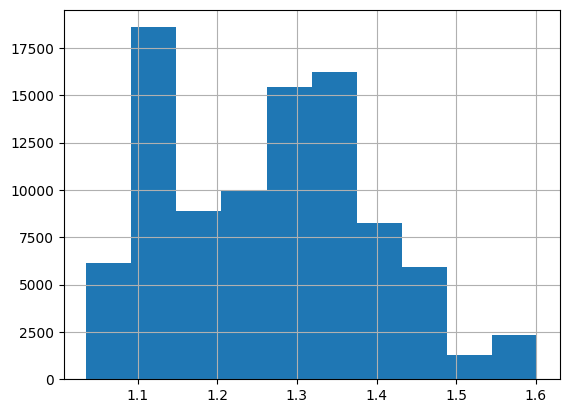

In [89]:
df.BC.hist()

<Axes: >

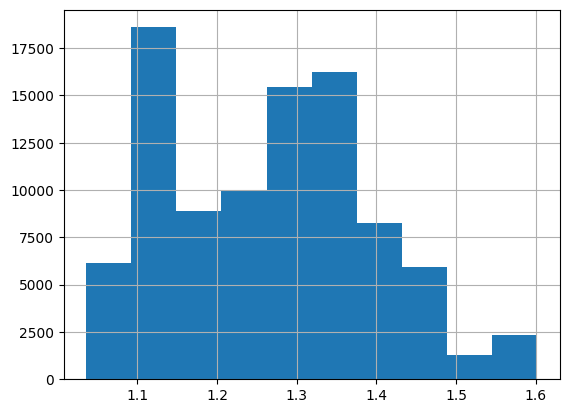

In [90]:
df.AC.hist()

In [288]:
df['Datetime']

0       2005-05-02 00:00:00
1       2005-05-02 01:00:00
2       2005-05-02 02:00:00
3       2005-05-02 03:00:00
4       2005-05-02 04:00:00
                ...        
93079   2020-04-29 18:00:00
93080   2020-04-29 19:00:00
93081   2020-04-29 20:00:00
93082   2020-04-29 21:00:00
93083   2020-04-29 22:00:00
Name: Datetime, Length: 93084, dtype: datetime64[ns]

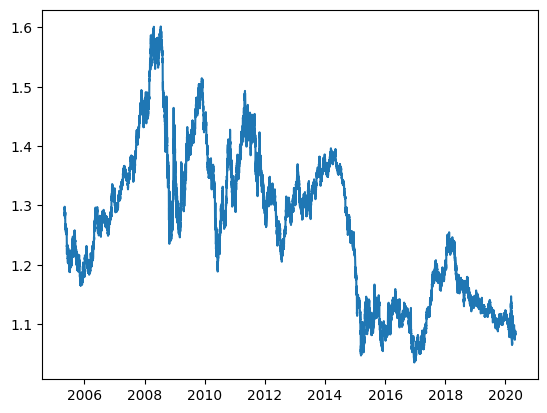

In [113]:
plt.plot(df['Datetime'], df['BC'])


In [289]:
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(columns=['Datetime'])

In [10]:
df.columns

Index(['Date', 'Time', 'BO', 'BH', 'BL', 'BC', 'BCh', 'AO', 'AH', 'AL', 'AC',
       'ACh'],
      dtype='object')

In [290]:
df = df.drop(columns=['Date'])

In [12]:
df = df.drop(columns=['Time'])

In [ ]:
df

,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
Datetime,,,,,,,,,,,
2005-05-02 00:00:00,00:00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
2005-05-02 01:00:00,01:00:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2005-05-02 02:00:00,02:00:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
2005-05-02 03:00:00,03:00:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
2005-05-02 04:00:00,04:00:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29 18:00:00,18:00:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
2020-04-29 19:00:00,19:00:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
2020-04-29 20:00:00,20:00:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050


In [45]:
df.describe()

,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
count,93084.000000,93084.000000,93084.000000,93084.000000,9.308400e+04,93084.000000,93084.000000,93084.000000,93084.000000,93084.000000
mean,1.265734,1.266755,1.264736,1.265733,-8.928495e-07,1.265900,1.266917,1.264897,1.265899,-0.000001
std,0.126894,0.127060,0.126722,0.126892,1.544143e-03,0.126891,0.127053,0.126715,0.126891,0.001546
min,1.035530,1.036970,1.033950,1.035550,-2.505000e-02,1.035660,1.037100,1.034090,1.035680,-0.024950
25%,1.139878,1.140728,1.139130,1.139880,-6.000000e-04,1.140050,1.140890,1.139300,1.140048,-0.000590
50%,1.274100,1.275315,1.272955,1.274105,1.000000e-05,1.274280,1.275490,1.273150,1.274290,0.000000
75%,1.357615,1.358770,1.356533,1.357630,6.000000e-04,1.357770,1.358920,1.356673,1.357770,0.000600
max,1.601310,1.603840,1.599200,1.601390,3.022000e-02,1.601400,1.603930,1.599290,1.601480,0.030430


In [292]:
df['Price_open'] = df[['BO', 'AO']].mean(axis=1)

In [293]:
df.pop('AO')

Datetime
2005-05-02 00:00:00    1.28540
2005-05-02 01:00:00    1.28460
2005-05-02 02:00:00    1.28450
2005-05-02 03:00:00    1.28530
2005-05-02 04:00:00    1.28540
                        ...   
2020-04-29 18:00:00    1.08660
2020-04-29 19:00:00    1.08725
2020-04-29 20:00:00    1.08758
2020-04-29 21:00:00    1.08808
2020-04-29 22:00:00    1.08756
Name: AO, Length: 93084, dtype: float64

In [294]:
df.pop('BO')

Datetime
2005-05-02 00:00:00    1.28520
2005-05-02 01:00:00    1.28440
2005-05-02 02:00:00    1.28430
2005-05-02 03:00:00    1.28510
2005-05-02 04:00:00    1.28520
                        ...   
2020-04-29 18:00:00    1.08620
2020-04-29 19:00:00    1.08711
2020-04-29 20:00:00    1.08747
2020-04-29 21:00:00    1.08708
2020-04-29 22:00:00    1.08728
Name: BO, Length: 93084, dtype: float64

In [295]:
df['Highest'] = df[['BH', 'AH']].mean(axis=1)
df['Lowest'] = df[['BL', 'AL']].mean(axis=1)

In [296]:
df.pop('BH')
df.pop('AH')
df.pop('AL')
df.pop('BL')

Datetime
2005-05-02 00:00:00    1.28400
2005-05-02 01:00:00    1.28390
2005-05-02 02:00:00    1.28410
2005-05-02 03:00:00    1.28500
2005-05-02 04:00:00    1.28490
                        ...   
2020-04-29 18:00:00    1.08611
2020-04-29 19:00:00    1.08659
2020-04-29 20:00:00    1.08691
2020-04-29 21:00:00    1.08699
2020-04-29 22:00:00    1.08727
Name: BL, Length: 93084, dtype: float64

In [301]:
df

,Time,BC,BCh,AC,ACh,Price_open,Highest,Lowest
Datetime,,,,,,,,
2005-05-02 00:00:00,00:00:00,1.28440,-0.00080,1.28460,-0.00080,1.285300,1.285300,1.284100
2005-05-02 01:00:00,01:00:00,1.28420,-0.00020,1.28440,-0.00020,1.284500,1.284900,1.284000
2005-05-02 02:00:00,02:00:00,1.28510,0.00080,1.28530,0.00080,1.284400,1.285500,1.284200
2005-05-02 03:00:00,03:00:00,1.28510,0.00000,1.28530,0.00000,1.285200,1.286000,1.285100
2005-05-02 04:00:00,04:00:00,1.28550,0.00030,1.28570,0.00030,1.285300,1.286000,1.285000
...,...,...,...,...,...,...,...,...
2020-04-29 18:00:00,18:00:00,1.08713,0.00093,1.08726,0.00066,1.086400,1.088580,1.086255
2020-04-29 19:00:00,19:00:00,1.08748,0.00037,1.08760,0.00035,1.087180,1.088300,1.086670
2020-04-29 20:00:00,20:00:00,1.08708,-0.00039,1.08808,0.00050,1.087525,1.087990,1.086985


In [303]:
df['Price_close'] = df[['BC', 'AC']].mean(axis=1)

In [305]:
df.pop('BC')
df.pop('AC')

Datetime
2005-05-02 00:00:00    1.28460
2005-05-02 01:00:00    1.28440
2005-05-02 02:00:00    1.28530
2005-05-02 03:00:00    1.28530
2005-05-02 04:00:00    1.28570
                        ...   
2020-04-29 18:00:00    1.08726
2020-04-29 19:00:00    1.08760
2020-04-29 20:00:00    1.08808
2020-04-29 21:00:00    1.08766
2020-04-29 22:00:00    1.08760
Name: AC, Length: 93084, dtype: float64

In [308]:
df['change'] = df[['BCh', 'ACh']].mean(axis=1)
df.pop('BCh')
df.pop('ACh')

Datetime
2005-05-02 00:00:00   -0.00080
2005-05-02 01:00:00   -0.00020
2005-05-02 02:00:00    0.00080
2005-05-02 03:00:00    0.00000
2005-05-02 04:00:00    0.00030
                        ...   
2020-04-29 18:00:00    0.00066
2020-04-29 19:00:00    0.00035
2020-04-29 20:00:00    0.00050
2020-04-29 21:00:00   -0.00042
2020-04-29 22:00:00    0.00004
Name: ACh, Length: 93084, dtype: float64

In [324]:
df['Hour'] = df.index.hour
df['hour_sin'] = np.sin(2*np.pi * df.index.hour/24)
df['hour_cos'] = np.cos(2*np.pi * df.index.hour/24)
df.pop('Time')
df.pop('Hour')
df

,Price_open,Highest,Lowest,Price_close,change,hour_sin,hour_cos
Datetime,,,,,,,
2005-05-02 00:00:00,1.285300,1.285300,1.284100,1.284500,-0.000800,0.000000,1.000000e+00
2005-05-02 01:00:00,1.284500,1.284900,1.284000,1.284300,-0.000200,0.258819,9.659258e-01
2005-05-02 02:00:00,1.284400,1.285500,1.284200,1.285200,0.000800,0.500000,8.660254e-01
2005-05-02 03:00:00,1.285200,1.286000,1.285100,1.285200,0.000000,0.707107,7.071068e-01
2005-05-02 04:00:00,1.285300,1.286000,1.285000,1.285600,0.000300,0.866025,5.000000e-01
...,...,...,...,...,...,...,...
2020-04-29 18:00:00,1.086400,1.088580,1.086255,1.087195,0.000795,-1.000000,-1.836970e-16
2020-04-29 19:00:00,1.087180,1.088300,1.086670,1.087540,0.000360,-0.965926,2.588190e-01
2020-04-29 20:00:00,1.087525,1.087990,1.086985,1.087580,0.000055,-0.866025,5.000000e-01


In [328]:
features = df.columns.values

In [360]:
X_all = df[features].values
y_all = df['Price_close'].values

In [361]:
print(X_all.shape)
print(y_all.shape)
print(len(df) - 72)

(93084, 7)
(93084,)
93012


In [362]:
window_len = 72

X = []
y = []

for i in range(len(df)-window_len):
    X.append(X_all[i:i+window_len])
    y.append(y_all[i+window_len])

X = np.array(X)
y = np.array(y).reshape(-1, 1)
X.shape
y.shape

(93012, 1)

In [363]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [364]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_features = ['Price_open', 'Highest', 'Lowest', 'Price_close', 'change']

# reshape для 3D массива
X_train_reshaped = X_train[:, :, :len(num_features)].reshape(-1, len(num_features))
X_val_reshaped = X_val[:, :, :len(num_features)].reshape(-1, len(num_features))
X_test_reshaped = X_test[:, :, :len(num_features)].reshape(-1, len(num_features))

scaler.fit(X_train_reshaped)


X_train[:, :, :len(num_features)] = scaler.transform(X_train_reshaped).reshape(X_train[:, :, :len(num_features)].shape)
X_val[:, :, :len(num_features)] = scaler.transform(X_val_reshaped).reshape(X_val[:, :, :len(num_features)].shape)
X_test[:, :, :len(num_features)] = scaler.transform(X_test_reshaped).reshape(X_test[:, :, :len(num_features)].shape)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1,1))
y_val = y_scaler.transform(y_val.reshape(-1,1))
y_test = y_scaler.transform(y_test.reshape(-1,1))


7

In [365]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='Adam', loss='mse', metrics=['mae'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32
)

Epoch 1/100


/Users/data/VsCodeProjects/DataScience/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2035/2035 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0014 - mae: 0.0233 - val_loss: 1.4040e-04 - val_mae: 0.0100
Epoch 2/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 2.2284e-04 - mae: 0.0109 - val_loss: 6.3776e-05 - val_mae: 0.0067
Epoch 3/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 1.2766e-04 - mae: 0.0082 - val_loss: 7.3158e-05 - val_mae: 0.0070
Epoch 4/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 8.3766e-05 - mae: 0.0065 - val_loss: 7.1713e-05 - val_mae: 0.0073
Epoch 5/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 6.4294e-05 - mae: 0.0056 - val_loss: 9.4123e-05 - val_mae: 0.0072
Epoch 6/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 5.5941e-05 - mae: 0.0052 - val_loss: 8.8520e-05 - val_mae: 0.0082
Epoch 7/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 4.7983e-05 - mae: 0.0047 - val_loss: 1.2684e-04 - val_mae: 0.0084
Epoch 8/100
2035/2035 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 4.1935e-05 - mae: 0.0045 - val_loss: 1.056

In [269]:
y = df['price'].shift(-1)  # чтобы прогнозировать следующую цену
X = df[features].iloc[:-1]  # убираем последнюю строку
y = y.iloc[:-1]    

In [99]:
y.iloc[-3:-1]

Datetime
2020-04-29 20:00:00    1.087180
2020-04-29 21:00:00    1.087525
Name: price, dtype: float64

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=False)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test  = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [271]:
model = Sequential([
    LSTM(48, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(64, activation='elu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=100, batch_size=60)

Epoch 1/100


/Users/data/VsCodeProjects/DataScience/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.1010
Epoch 2/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0397
Epoch 3/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.0129
Epoch 4/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0092
Epoch 5/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.0087
Epoch 6/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0081
Epoch 7/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.0080
Epoch 8/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.0070
Epoch 9/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.0077
Epoch 10/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0071
Epoch 11/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0068
Epoch 12/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0069
Epoch 13/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0069
Epoch 14/100
466/466 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0069
Epoch 15/100
466/466 ━━━━━━

In [272]:
X_pred = model.predict(X_test)

2037/2037 ━━━━━━━━━━━━━━━━━━━━ 1s 217us/step


In [254]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mean_squared_error(y_test, X_pred)

3.243658836184506e-06

In [281]:
x_example = X_pred[0:3]  # (1, timesteps, features)
y_true = y_test[1]
y_true

/var/folders/9c/vk6dn3k90g9cy2bswv5c6kk00000gn/T/ipykernel_61727/312228033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_true = y_test[1]


np.float64(1.503825)

In [255]:
y_pred = model.predict(x_example)
print("Прогноз модели:", y_pred[0][0])
print("Реальное значение:", y_true)
print('Погрешность', 100 - y_pred[0][0]/y_true * 100,'%')
print(mean_absolute_error(y_test, X_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Прогноз модели: 1.1649953
Реальное значение: 1.1644
Погрешность -0.051132202 %
0.001468556228050142


In [258]:
x_example = np.array([[[1.1663, 1.16718, 1.16586]]])  # (1, timesteps, features)
y_true = np.float32(1.16538)

In [259]:
y_pred = model.predict(x_example)
print("Прогноз модели:", y_pred[0][0])
print("Реальное значение:", y_true)
print('Погрешность', 100 - y_pred[0][0]/y_true * 100,'%')
#epoches=100, batch_size = 60

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Прогноз модели: 1.1669397
Реальное значение: 1.16538
Погрешность -0.13383484 %
